# Preparing Time Series from Wide-Form Data

In [2]:
# imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

# Part1

In [3]:
# loding data
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [4]:
# Filter the 4 largest cities into a new dataframe. the 4 largest cities would have rank values of [0,1,2,3]
new_df = df.loc[df['SizeRank'] < 4]
new_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [5]:
# Melt the data to long-form and prepare it for time series analysis
melted = pd.melt(new_df, id_vars = ['RegionID',	'SizeRank',	'RegionName',	'RegionType',	'StateName',	'State',	'Metro',	'CountyName'],
                 value_name='HomeValue', var_name ='Date')
melted               

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,HomeValue
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [6]:
# Convert the melted dates into datetime datatype.
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   HomeValue   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [7]:
# Make the datetime column the index.
melted = melted.set_index('Date')
melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,HomeValue
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0


In [8]:
melted['RegionType'].value_counts()

city    1092
Name: RegionType, dtype: int64

In [9]:
melted['RegionName'].value_counts()

New York       273
Los Angeles    273
Houston        273
Chicago        273
Name: RegionName, dtype: int64

In [10]:
# Resample the dataframe as monthly frequency, grouped by City
df_ts = melted.groupby('RegionName').resample("M").sum()
df_ts

C:\Users\user\AppData\Local\Temp\ipykernel_8020\3284274389.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").sum()
C:\Users\user\AppData\Local\Temp\ipykernel_8020\3284274389.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").sum()
C:\Users\user\AppData\Local\Temp\ipykernel_8020\3284274389.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be val

RegionID  SizeRank  HomeValue
RegionName Date                                     
Chicago    2000-01-31     17426         3   166139.0
           2000-02-29     17426         3   166536.0
           2000-03-31     17426         3   167368.0
           2000-04-30     17426         3   168826.0
           2000-05-31     17426         3   170499.0
...                         ...       ...        ...
New York   2022-05-31      6181         0   768797.0
           2022-06-30      6181         0   773944.0
           2022-07-31      6181         0   777692.0
           2022-08-31      6181         0   779960.0
           2022-09-30      6181         0   781622.0

[1092 rows x 3 columns]

In [11]:
df_ts.index

MultiIndex([( 'Chicago', '2000-01-31'),
            ( 'Chicago', '2000-02-29'),
            ( 'Chicago', '2000-03-31'),
            ( 'Chicago', '2000-04-30'),
            ( 'Chicago', '2000-05-31'),
            ( 'Chicago', '2000-06-30'),
            ( 'Chicago', '2000-07-31'),
            ( 'Chicago', '2000-08-31'),
            ( 'Chicago', '2000-09-30'),
            ( 'Chicago', '2000-10-31'),
            ...
            ('New York', '2021-12-31'),
            ('New York', '2022-01-31'),
            ('New York', '2022-02-28'),
            ('New York', '2022-03-31'),
            ('New York', '2022-04-30'),
            ('New York', '2022-05-31'),
            ('New York', '2022-06-30'),
            ('New York', '2022-07-31'),
            ('New York', '2022-08-31'),
            ('New York', '2022-09-30')],
           names=['RegionName', 'Date'], length=1092)

# Part2

In [12]:
# slice Home Value column 
df_plot = df_ts[['HomeValue']]
df_plot

HomeValue
RegionName Date                 
Chicago    2000-01-31   166139.0
           2000-02-29   166536.0
           2000-03-31   167368.0
           2000-04-30   168826.0
           2000-05-31   170499.0
...                          ...
New York   2022-05-31   768797.0
           2022-06-30   773944.0
           2022-07-31   777692.0
           2022-08-31   779960.0
           2022-09-30   781622.0

[1092 rows x 1 columns]

In [13]:
unstacked = df_plot.unstack(level=0)
unstacked

HomeValue                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [14]:
#  create a function to use thousands of dollars with a "K" at the end
def thousands(x,pos):
    new_x = x/1_000
    return f"{new_x:,.0f}K"

# Create the formatter
fmt_thous = mticks.FuncFormatter(thousands)

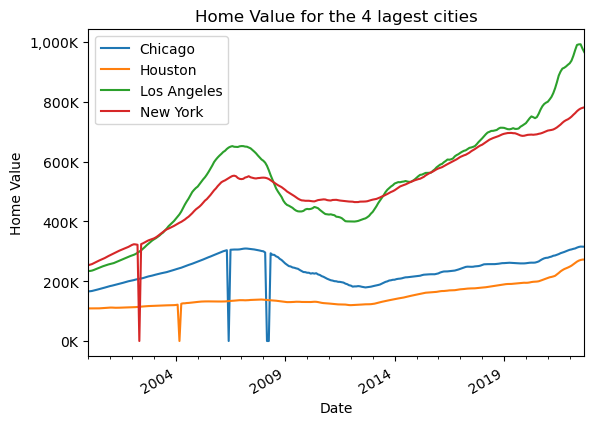

In [15]:
# Plot the home values for all 4 cities. 
fig, ax = plt.subplots()
unstacked['HomeValue'].plot(ax=ax)

# add title & y-axis label
ax.set(title = 'Home Value for the 4 lagest cities', ylabel ='Home Value')

# format the y-axis ticks 
ax.yaxis.set_major_formatter(fmt_thous)

# add legend
ax.legend()
fig.autofmt_xdate()

1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [16]:
hv_2008 = df_plot.loc[pd.IndexSlice[:,'2008-12'], :]
hv_2008

,,HomeValue
RegionName,Date,
Chicago,2008-12-31,265306.0
Houston,2008-12-31,131283.0
Los Angeles,2008-12-31,469294.0
New York,2008-12-31,510309.0


In [17]:
# determine the city that have the highest home value 
hv_208_max = hv_2008.idxmax()
hv_208_max

HomeValue    (New York, 2008-12-31 00:00:00)
dtype: object

In [18]:
# determine the city that have the lowest home value 
hv_208_min = hv_2008.idxmin()
hv_208_min

HomeValue    (Houston, 2008-12-31 00:00:00)
dtype: object

2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [19]:
hv_change = unstacked.diff()
hv_change

HomeValue                             
RegionName   Chicago Houston Los Angeles New York
Date                                             
2000-01-31       NaN     NaN         NaN      NaN
2000-02-29     397.0    11.0       220.0   1827.0
2000-03-31     832.0  -201.0      1112.0   1690.0
2000-04-30    1458.0     3.0      2076.0   3103.0
2000-05-31    1673.0   -47.0      2524.0   2894.0
...              ...     ...         ...      ...
2022-05-31    2838.0  4457.0     17223.0   6476.0
2022-06-30    2176.0  3343.0      1946.0   5147.0
2022-07-31    1247.0  2158.0       293.0   3748.0
2022-08-31    -323.0  1341.0    -14434.0   2268.0
2022-09-30    -158.0   239.0    -11601.0   1662.0

[273 rows x 4 columns]

In [20]:
#  use df.columns.droplevel() with an index 0 to drop HomeValue index
hv_change.columns = hv_change.columns.droplevel(0)
hv_change

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,NaN,NaN,NaN,NaN
2000-02-29,397.0,11.0,220.0,1827.0
2000-03-31,832.0,-201.0,1112.0,1690.0
2000-04-30,1458.0,3.0,2076.0,3103.0
2000-05-31,1673.0,-47.0,2524.0,2894.0
...,...,...,...,...
2022-05-31,2838.0,4457.0,17223.0,6476.0
2022-06-30,2176.0,3343.0,1946.0,5147.0
2022-07-31,1247.0,2158.0,293.0,3748.0


In [22]:
# Extract the change for December 2008
change_dec_2008 = hv_change.loc['2008-12']
for name in change_dec_2008.columns :
    value_change = change_dec_2008[name].item()
    print(f"from November 2008 to December 2008, home values change was {value_change}$ for {name}")

from November 2008 to December 2008, home values change was -5753.0$ for Chicago
from November 2008 to December 2008, home values change was -964.0$ for Houston
from November 2008 to December 2008, home values change was -12611.0$ for Los Angeles
from November 2008 to December 2008, home values change was -4458.0$ for New York


# Time Series Models for Home Values

## 1. Import libraries and Custom Functions

In [55]:
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import pmdarima as pm
from pmdarima.arima.utils import ndiffs, nsdiffs
from pmdarima.model_selection import train_test_split

plt.rcParams['figure.figsize'] = (12, 3)

In [62]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [63]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)



    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()
    
    return fig

In [60]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

## 2. Preparing Data

In [66]:
# Filter the dataset for New York
ts_NY = df_plot.loc['New York', 'HomeValue']
ts_NY

Date
2000-01-31    253690.0
2000-02-29    255517.0
2000-03-31    257207.0
2000-04-30    260310.0
2000-05-31    263204.0
                ...   
2022-05-31    768797.0
2022-06-30    773944.0
2022-07-31    777692.0
2022-08-31    779960.0
2022-09-30    781622.0
Freq: M, Name: HomeValue, Length: 273, dtype: float64

In [93]:
# Filter the dataset only to include values starting in 2018 
ts_NY = ts_NY.loc['2018':]
ts_NY.head()

Date
2018-01-31    656700.0
2018-02-28    661012.0
2018-03-31    665672.0
2018-04-30    669989.0
2018-05-31    673514.0
Freq: M, Name: HomeValue, dtype: float64

In [68]:
# Check for and address null values.
ts_NY.isna().sum()

0

## 3. Determine if a seasonal or non-seasonal model is appropriate for the data

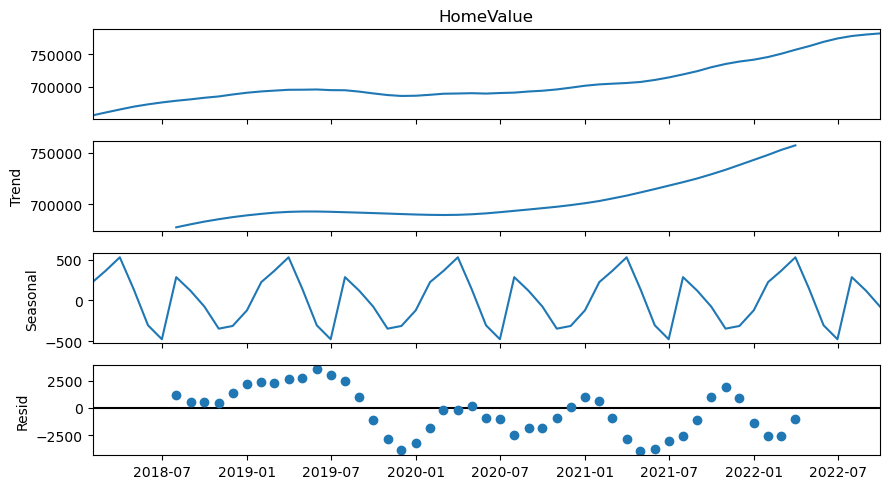

In [69]:
## Use Seasonal Decompose to check for seasonality
decomp = tsa.seasonal_decompose(ts_NY)
fig = decomp.plot()
fig.set_size_inches(9, 5)
fig.tight_layout()

Seasonal_decomose indicate some seasonality. We should consider how impactful the seasonal component is. 

In [70]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(ts_NY.max()-ts_NY.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is 1006.1319444444575 which is ~0.81% of the variation in time series.


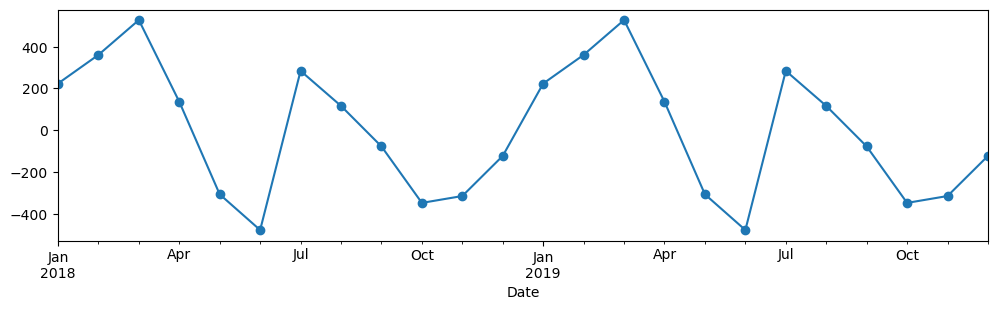

In [73]:
# zooming in on smaller time period to see length of season
seasonal = decomp.seasonal
ax = seasonal.loc['2018': '2019'].plot(marker = 'o')

The plot indicate a seasonal period of 12 months.

## 4. Check Stationarity and determine differencing (d and D)

In [77]:
# Check for stationarity
get_adfuller_results(ts_NY)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,0.407572,4,52,0.981776,0.05,False


In [78]:
# Determine differencing
d = ndiffs(ts_NY)
print(f'd is {d}')
D = nsdiffs(ts_NY, m = 12)
print(f'D is {D}')

d is 2
D is 0


In [82]:
# Apply the differencing
ts_diff = ts_NY.diff().diff().dropna()

In [87]:
# confirm stationarity
get_adfuller_results(ts_diff)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-5.461615,2,52,0.000003,0.05,True


## 5. Check Autocorrelation and Partial Autocorrelation to determine initial orders

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 40 must be < 27.

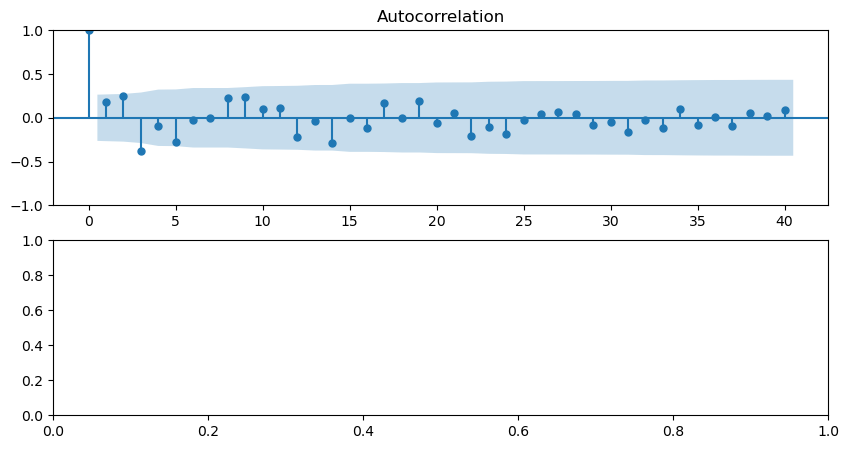

In [84]:
# Use the custom function and annotate seasons
plot_acf_pacf(ts_diff, annotate_seas=True, m = 12);

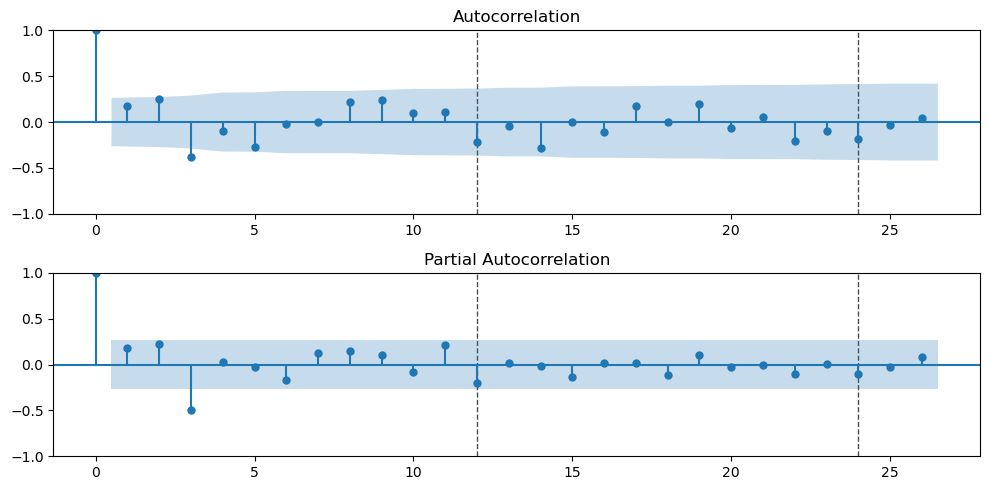

In [86]:
# Use the custom function and annotate seasons
plot_acf_pacf(ts_diff, nlags = 26, annotate_seas=True, m = 12);

 our first seasonal model: (1,2,1)(1,0,1)[12]

## 6. Split into Training and Test Sets

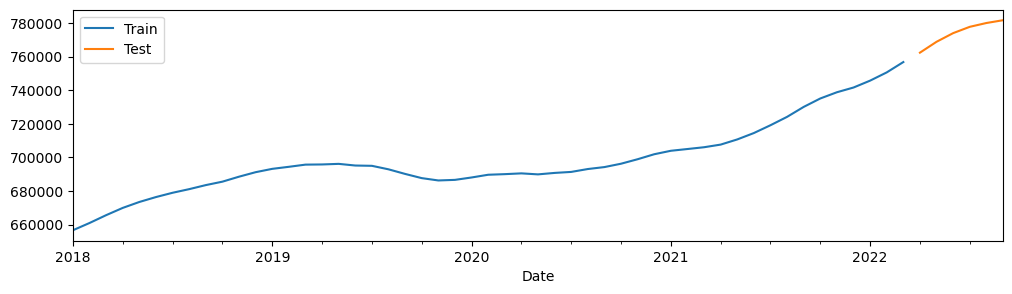

In [100]:
# train-test-split
train, test = train_test_split(ts_NY, test_size=6)
# Visualize train-test-split
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

## 7. Define the Time Series Model Orders and Fit the model to the training data

In [121]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 2  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

C:\Users\user\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [122]:
# Obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                        HomeValue   No. Observations:                   51
Model:             ARIMA(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                -401.677
Date:                          Mon, 10 Jun 2024   AIC                            813.353
Time:                                  16:38:05   BIC                            822.812
Sample:                              01-31-2018   HQIC                           816.942
                                   - 03-31-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9240      0.177     -5.232      0.000      -1.270      -0.578
ma.L1          0.9230      0.178      5.171      0.000       0.573       1.273
ar.S.L12       0.9295      2.578      0.361      0.718      -4.124       5.983
ma.S.L12      -0.9287      2.582     -0.360      0.719      -5.990       4.133
sigma2      7.509e+05   3.64e-06   2.06e+11      0.000    7.51e+05    7.51e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.60   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.21   Prob(JB):                         0.41
Heteroskedasticity (H):               2.29   Skew:                            -0.04
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.58e+29. Standard errors may be unstable.
"""

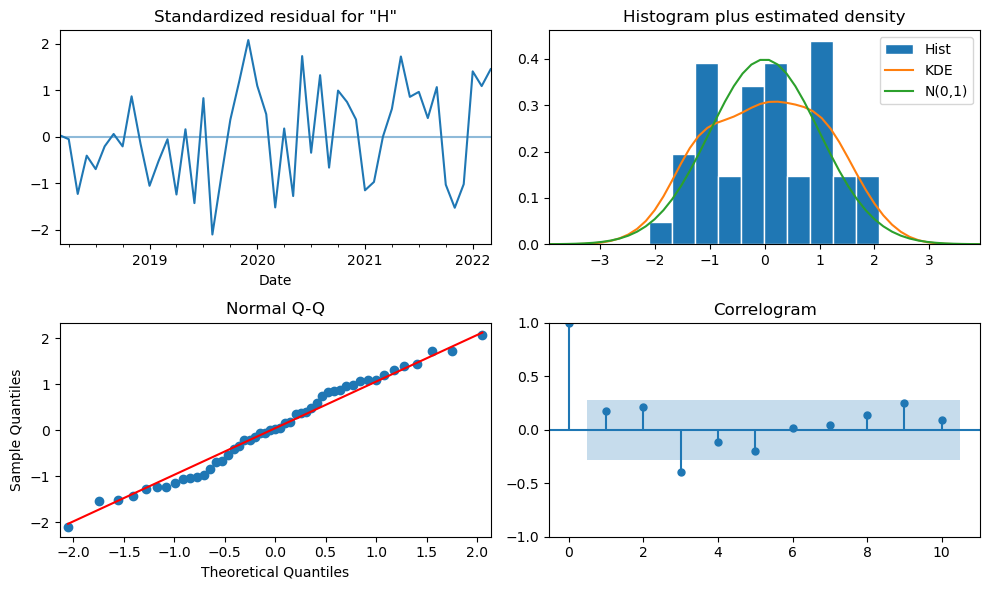

In [123]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

Our seasonal lags are insignificant, so our data would be compatible with the model if we removed them. 

A significant value in the correlogram of the residuals at lag 3  indicates this model may have missed something. 

## 8.Generate and Visualize Forecasts

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 4,205.928
- MSE = 36,065,006.964
- RMSE = 6,005.415
- R^2 = 0.201
- MAPE = 0.54%


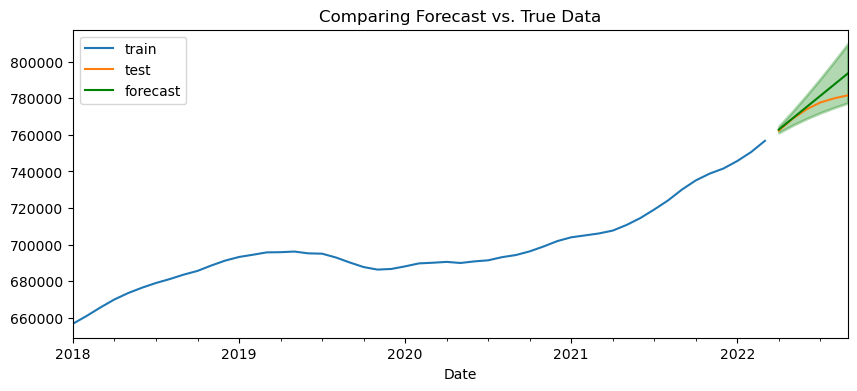

In [124]:
# Obtain summary of forecast as dataframe
forecast_df = sarima.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df)
# Obtain metrics
regression_metrics_ts(test, forecast_df["mean"])

The MAPE is less than 1%.

## 9.Grid Search Orders with pmdarima

In [125]:
# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,  
    m=12,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1040.347, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=909.717, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=930.102, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=912.587, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=940.569, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=911.717, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=911.717, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=913.717, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=928.324, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=910.593, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=907.207, Time=0.09 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=909.209, Time=0.23 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1024.876, Time=0.09 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=911.335, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[12] interc

The output indicate that the best model (based on AIC) is ARIMA(1,1,0)(0,0,0)[12].  If we compare this to our initial model, we determine that auto_arima eliminated the two insignificant coefficients in the initial model.
we should consider additional metrics before selecting the final model.

In [126]:
# Obtain summary of the best model from auto_arima
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   51
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -449.603
Date:                Mon, 10 Jun 2024   AIC                            907.207
Time:                        16:38:08   BIC                            914.855
Sample:                    01-31-2018   HQIC                           910.119
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    593.8235   1281.381      0.463      0.643   -1917.637    3105.283
ar.L1          0.6749      0.693      0.974      0.330      -0.683       2.032
ma.L1         -0.6674      0.694     -0.962      0.336      -2.028       0.693
sigma2      3.622e+06      0.252   1.44e+07      0.000    3.62e+06    3.62e+06
===================================================================================
Ljung-Box (L1) (Q):                  37.34   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.00   Prob(JB):                         0.99
Heteroskedasticity (H):               4.84   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.08e+24. Standard errors may be unstable.
"""

The AIC and BIC have increased slightly from the previous model. 

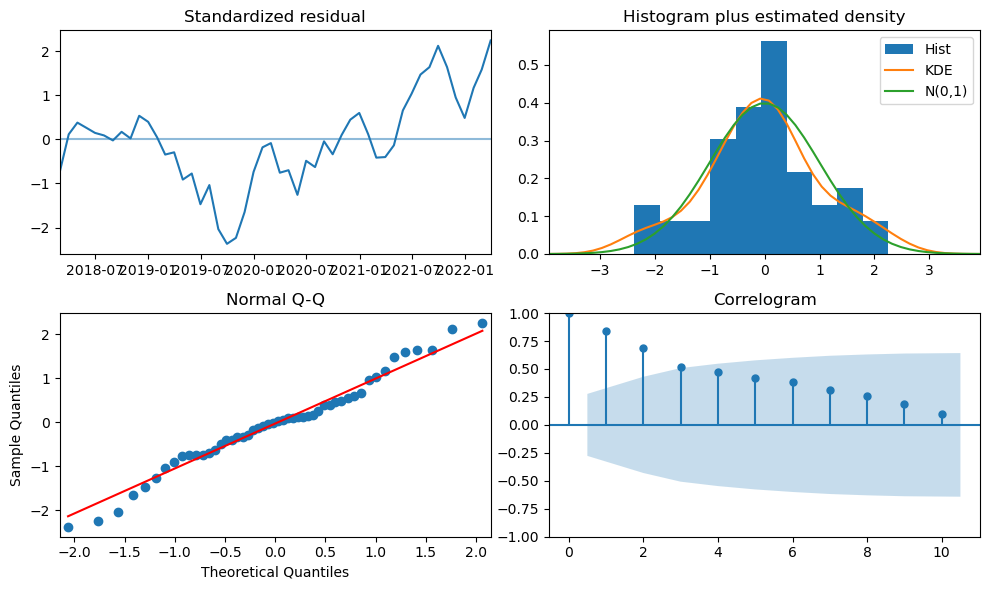

In [127]:
# Obtain diagnostic plots
fig = auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

There is still a more significant value in the correlogram

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 10,336.391
- MSE = 119,088,166.132
- RMSE = 10,912.752
- R^2 = -1.640
- MAPE = 1.33%


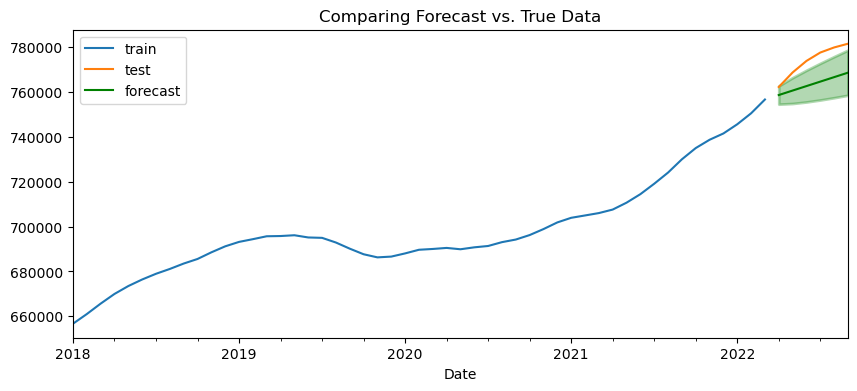

In [128]:
# Use auto_arima parameters to fit an ARIMA
auto_model = tsa.ARIMA(
    train, order=auto_model.order, seasonal_order=auto_model.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df = auto_model.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

The MAPE value is higher then what we found previously. Visually, the model doesn't perfom well.
The initial model perform better.

## 10. Fit a final model on the entire time series

In [129]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 2  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

final_model = tsa.ARIMA(ts_NY, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

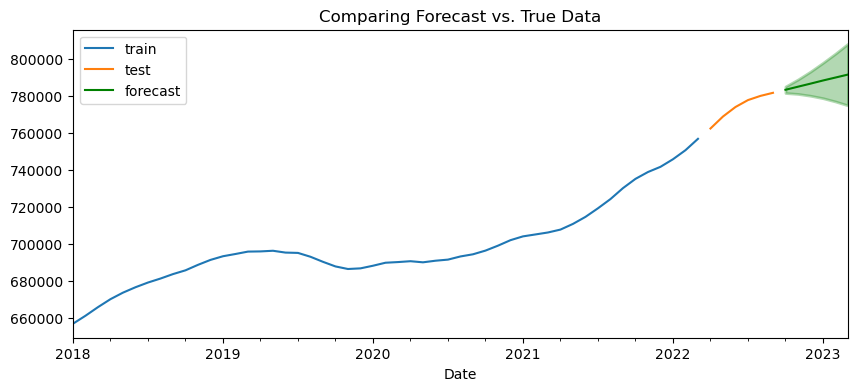

In [131]:
# Obtain future forecasts beyond 6 months
forecast_df  = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,forecast_df);

In [133]:
#  find the starting and ending dates of our forecast.
forecast_df.index[0],forecast_df.index[-1]

(Timestamp('2022-10-31 00:00:00', freq='M'),
 Timestamp('2023-03-31 00:00:00', freq='M'))

In [139]:
# Defining the starting value
starting_value = forecast_df['mean'].iloc[0]
starting_value

783271.8307322911

In [140]:
# Defining the final value.
final_value = forecast_df['mean'].iloc[-1]
final_value

791497.990220592

In [141]:
# Calculating the change in values.
change = final_value - starting_value
change

8226.15948830091

Our model's forecast indicates that the Home Value in NY will increase by about 8226$ over the forecast period.

In [142]:
# Calclate the percentage of change
perc_change = (change / starting_value) * 100
perc_change

1.0502304775355147

This is a percent increase of about 1%.

- Q1 What is the predicted home value in New York City 6 months into the future (beyond the dataset)?
   * 791497.99$

---
- Q2 What is the percent change in home values in New York City by the end of the 6-month forecast (beyond the dataset)?
   * 1%